# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [42]:
print(cities)

['adamstown', 'grytviken', 'guarapari', 'ust-nera', 'puri', 'uturoa', 'waitangi', 'bredasdorp', 'wailua homesteads', 'klyuchi', 'aasiaat', 'lebu', 'turpan', 'acapulco de juarez', 'maun', 'hermanus', 'panorama', 'yellowknife', 'arraial do cabo', 'abepura', 'onchan', 'yamada', 'west island', 'saint-francois', 'albany', 'la passe', 'bojnurd', 'norilsk', 'namdrik', 'ancud', 'isafjordur', 'punta arenas', 'taunggyi', 'stephenville', 'talnakh', 'puerto ayora', 'shenjiamen', 'juan de herrera', 'brisas de zicatela', 'thompson', 'severo-yeniseyskiy', 'bethel', 'port-aux-francais', 'stanley', 'posto fiscal rolim de moura', 'whitehorse', 'montereau-fault-yonne', 'baie-comeau', 'sinop', 'toliara', 'sikasso', 'presidente medici', 'hithadhoo', 'tiksi', 'chonchi', 'igede-ekiti', 'maloye ganyushkino', 'koungou', 'guachochi', 'ribeira grande', 'taiohae', 'allendale', 'markovo', 'invercargill', 'bechar', 'malvan', 'sisimiut', 'cidreira', 'buala', 'kavaratti', 'carnarvon', 'mount pearl', 'port pirie', 'ka

In [43]:
#sample to understand the data set
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "london"
units = "metric"
city_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(city_url + city).json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1704693581,
    "id": 2643743,
    "main": {
        "feels_like": 0.31,
        "humidity": 71,
        "pressure": 1030,
        "temp": 2.87,
        "temp_max": 3.41,
        "temp_min": 1.86
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1704701060,
        "sunset": 1704730146,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 2.57
    }
}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | guarapari
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | puri
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | turpan
Processing Record 14 of Set 1 | acapulco de juarez
Processing Record 15 of Set 1 | maun
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | panorama
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | abepura
Processing Record 21 of Set 1 | onchan
Processing Record 22 of Set 1 | yamada
Processing Record 23 of Set 1 | west

Processing Record 39 of Set 4 | barka'
City not found. Skipping...
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | nefteyugansk
Processing Record 42 of Set 4 | rongelap
Processing Record 43 of Set 4 | san antonio de pale
Processing Record 44 of Set 4 | graaff-reinet
Processing Record 45 of Set 4 | betio village
Processing Record 46 of Set 4 | mahibadhoo
Processing Record 47 of Set 4 | vetovo
Processing Record 48 of Set 4 | petropavlovsk-kamchatsky
Processing Record 49 of Set 4 | rio grande
Processing Record 0 of Set 5 | oasis
Processing Record 1 of Set 5 | port shepstone
Processing Record 2 of Set 5 | nanao
Processing Record 3 of Set 5 | san luis
Processing Record 4 of Set 5 | am djarass
City not found. Skipping...
Processing Record 5 of Set 5 | robstown
Processing Record 6 of Set 5 | vorgashor
Processing Record 7 of Set 5 | nishinoomote
Processing Record 8 of Set 5 | phan rang-thap cham
Processing Record 9 of Set 5 | puerto san jose
Processing Record 10 of Set 

Processing Record 33 of Set 8 | amos
Processing Record 34 of Set 8 | nasir
Processing Record 35 of Set 8 | katabu
Processing Record 36 of Set 8 | champerico
Processing Record 37 of Set 8 | praia da vitoria
Processing Record 38 of Set 8 | dinguiraye
Processing Record 39 of Set 8 | ebolowa
Processing Record 40 of Set 8 | asau
Processing Record 41 of Set 8 | nova prata
Processing Record 42 of Set 8 | trincomalee
Processing Record 43 of Set 8 | ulladulla
Processing Record 44 of Set 8 | malpica
Processing Record 45 of Set 8 | luganville
Processing Record 46 of Set 8 | qapqal
City not found. Skipping...
Processing Record 47 of Set 8 | grantsville
Processing Record 48 of Set 8 | pandan
Processing Record 49 of Set 8 | boa vista
Processing Record 0 of Set 9 | machico
Processing Record 1 of Set 9 | pangoa
Processing Record 2 of Set 9 | triyuga
City not found. Skipping...
Processing Record 3 of Set 9 | sao desiderio
Processing Record 4 of Set 9 | huarmey
Processing Record 5 of Set 9 | eilat
Proce

Processing Record 18 of Set 12 | sandnessjoen
Processing Record 19 of Set 12 | alaghsas
Processing Record 20 of Set 12 | mulayjah
Processing Record 21 of Set 12 | peniche
Processing Record 22 of Set 12 | vadso
Processing Record 23 of Set 12 | abu jibeha
Processing Record 24 of Set 12 | padang
Processing Record 25 of Set 12 | ta`u
Processing Record 26 of Set 12 | kidal
Processing Record 27 of Set 12 | santiago de cao
Processing Record 28 of Set 12 | forest grove
Processing Record 29 of Set 12 | primero de mayo
Processing Record 30 of Set 12 | kirakira
Processing Record 31 of Set 12 | abu zabad
Processing Record 32 of Set 12 | fort st. john
Processing Record 33 of Set 12 | mexico
Processing Record 34 of Set 12 | onguday
Processing Record 35 of Set 12 | sanawad
Processing Record 36 of Set 12 | caister-on-sea
Processing Record 37 of Set 12 | colonia
Processing Record 38 of Set 12 | shizuoka
Processing Record 39 of Set 12 | bonito
Processing Record 40 of Set 12 | tudor vladimirescu
Processi

In [45]:
city_data

[{'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 23.5,
  'Humidity': 76,
  'Cloudiness': 100,
  'Wind Speed': 6.14,
  'Country': 'PN',
  'Date': 1704694236},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 3.88,
  'Humidity': 88,
  'Cloudiness': 50,
  'Wind Speed': 1.53,
  'Country': 'GS',
  'Date': 1704694238},
 {'City': 'guarapari',
  'Lat': -20.6667,
  'Lng': -40.4975,
  'Max Temp': 24.94,
  'Humidity': 88,
  'Cloudiness': 47,
  'Wind Speed': 2.27,
  'Country': 'BR',
  'Date': 1704694239},
 {'City': 'ust-nera',
  'Lat': 64.5667,
  'Lng': 143.2,
  'Max Temp': -43.84,
  'Humidity': 98,
  'Cloudiness': 81,
  'Wind Speed': 1.55,
  'Country': 'RU',
  'Date': 1704694239},
 {'City': 'puri',
  'Lat': 19.8,
  'Lng': 85.85,
  'Max Temp': 23.29,
  'Humidity': 45,
  'Cloudiness': 13,
  'Wind Speed': 4.07,
  'Country': 'IN',
  'Date': 1704694240},
 {'City': 'uturoa',
  'Lat': -16.7333,
  'Lng': -151.4333,
  'Max Temp': 27,
  'Humidity': 79,
  

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,23.50,76,100,6.14,PN,1704694236
1,grytviken,-54.2811,-36.5092,3.88,88,50,1.53,GS,1704694238
2,guarapari,-20.6667,-40.4975,24.94,88,47,2.27,BR,1704694239
3,ust-nera,64.5667,143.2000,-43.84,98,81,1.55,RU,1704694239
4,puri,19.8000,85.8500,23.29,45,13,4.07,IN,1704694240


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.50,76,100,6.14,PN,1704694236
1,grytviken,-54.2811,-36.5092,3.88,88,50,1.53,GS,1704694238
2,guarapari,-20.6667,-40.4975,24.94,88,47,2.27,BR,1704694239
3,ust-nera,64.5667,143.2000,-43.84,98,81,1.55,RU,1704694239
4,puri,19.8000,85.8500,23.29,45,13,4.07,IN,1704694240


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

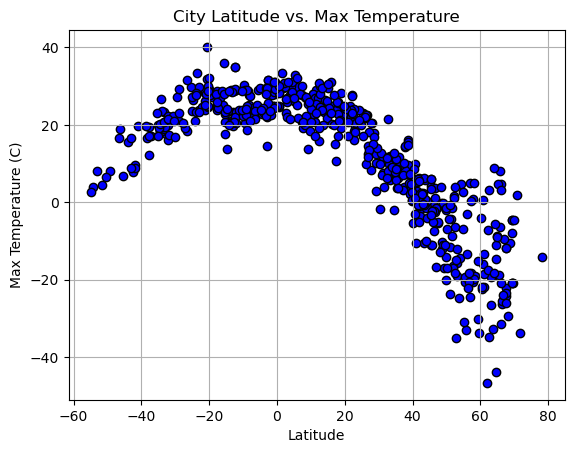

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

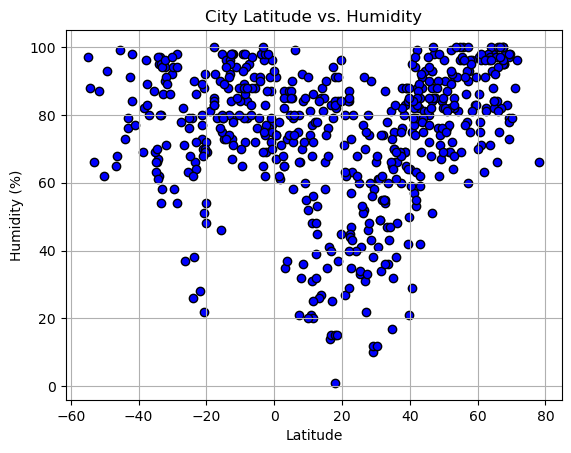

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', facecolors='b', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

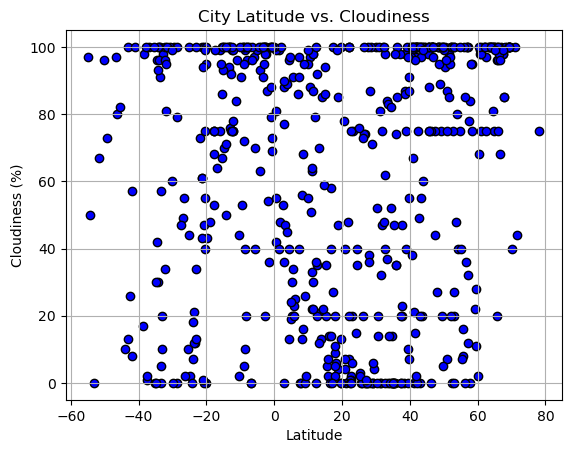

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', facecolors='b', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

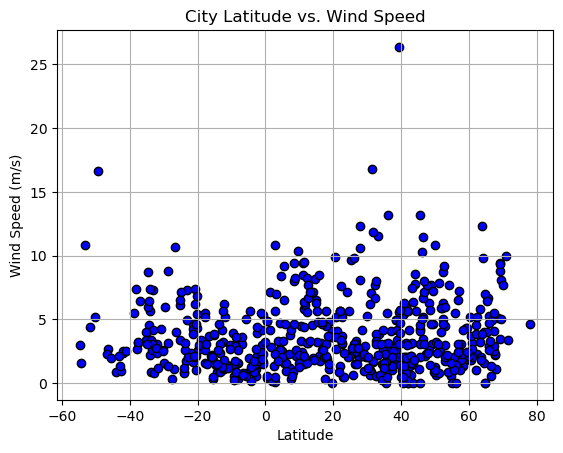

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', facecolors='b', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The r-value is: {rvalue**2}")
    
    plt.scatter(x_values, y_values)
    plt.xlabel('Latitude')
    plt.ylabel(title)
    
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15,color="red")

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ust-nera,64.5667,143.2000,-43.84,98,81,1.55,RU,1704694239
4,puri,19.8000,85.8500,23.29,45,13,4.07,IN,1704694240
8,wailua homesteads,22.0669,-159.3780,23.44,87,100,5.66,US,1704694243
9,klyuchi,52.2667,79.1667,1.52,99,100,8.72,RU,1704694243
10,aasiaat,68.7098,-52.8699,-10.64,83,100,5.13,GL,1704694244


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.50,76,100,6.14,PN,1704694236
1,grytviken,-54.2811,-36.5092,3.88,88,50,1.53,GS,1704694238
2,guarapari,-20.6667,-40.4975,24.94,88,47,2.27,BR,1704694239
5,uturoa,-16.7333,-151.4333,27.00,79,64,3.70,PF,1704694241
6,waitangi,-43.9535,-176.5597,15.46,73,10,0.89,NZ,1704694241


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7945314598053784


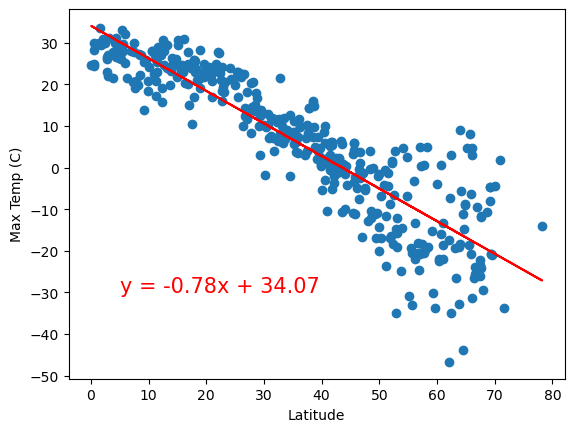

In [59]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = 'Max Temp (C)'
text_coordinates = (5,-30)

plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.412154610708935


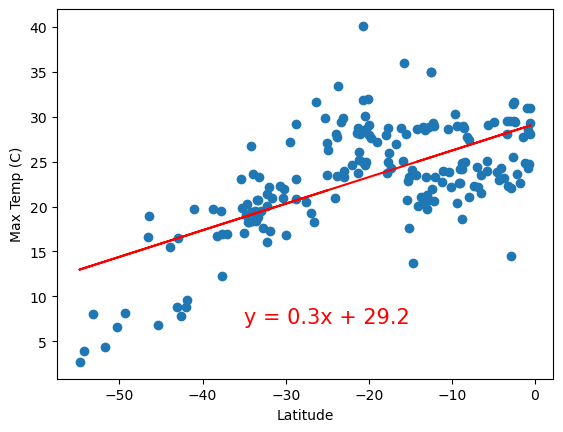

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = 'Max Temp (C)'
text_coordinates = (-35,7)

plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** This model is showing the relationship between the maximum temperature as it goes further away from the equator. It is evident that in the northern hemisphere, there is a strong relationship that as you go further north the maximum temperature decreases. Comparitively, in the southern hemisphere it shows that the temperature continues to increase, however not at the rate shown north of the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18506176460937468


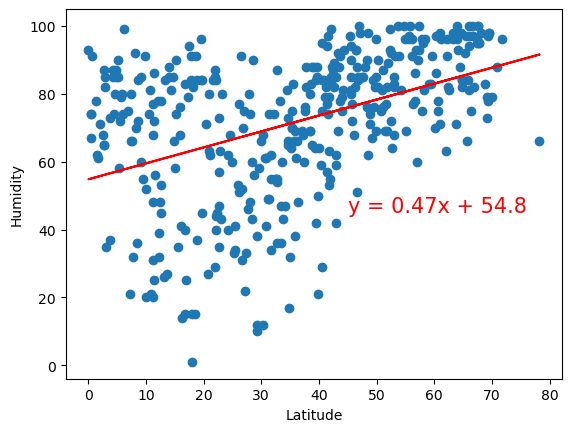

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
title = 'Humidity'
text_coordinates = (45,45)

plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.01106578370133352


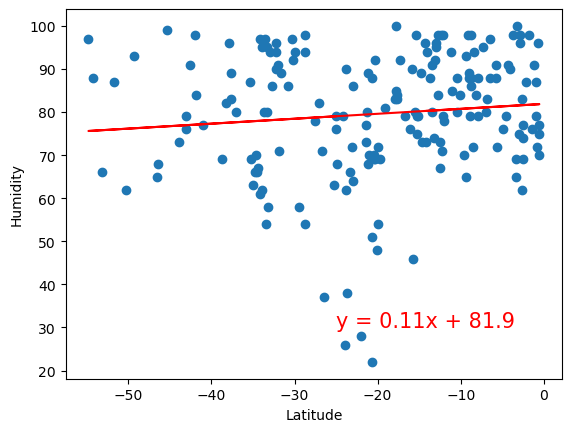

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = 'Humidity'
text_coordinates = (-25,30)

plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** The regression plots shows a largely inconclusive relationship between a city's latitude and corresponding humidity. The southern hemisphere plot is skewed with a handful of cities with very little humidity, otherwise humidity stays high despite the latitude. The northern hemisphere humidy is very scattered close to the equator, however, as it goes further North the humidity condenses and remains high. One possible conclusion is that due to the winter conditions North, we know that there is a lot of moisture at ground level, i.e. snow, this would contribute to the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12082335388022983


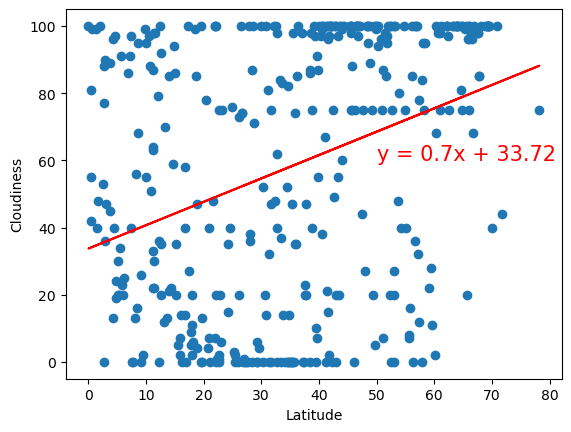

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = 'Cloudiness'
text_coordinates = (50,60)

plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.0418659445686715


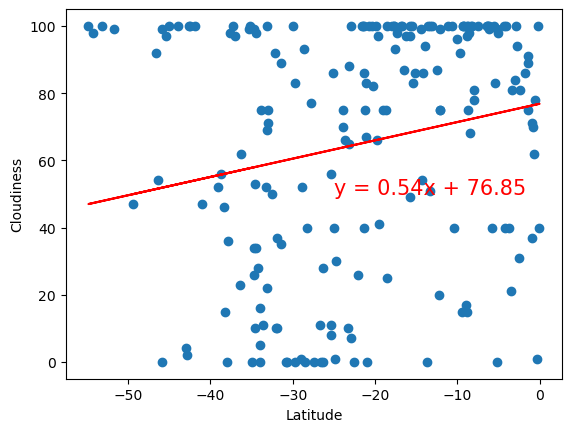

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
title = 'Cloudiness'
text_coordinates = (-25,50)

plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** The linear regression model between a city's latiude and cloudiness is slightly positive, showing as the Latitude increases as does the cloudiness. The r-value for each plot is very close to 0, meaning that this relationship is weak and more investigation is required for an accurate use for this data to be utilised.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 5.384858230317217e-05


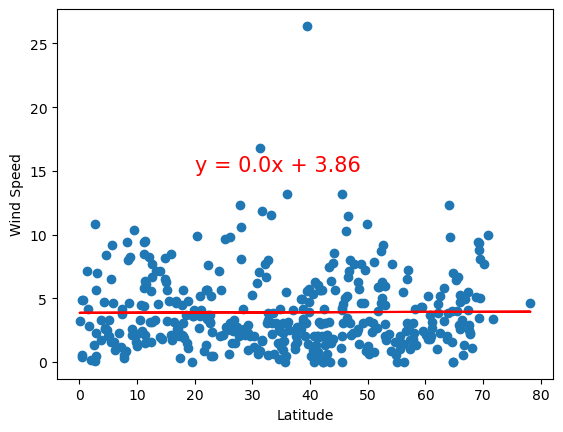

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = 'Wind Speed'
text_coordinates = (20,15)

plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 5.384858230317217e-05


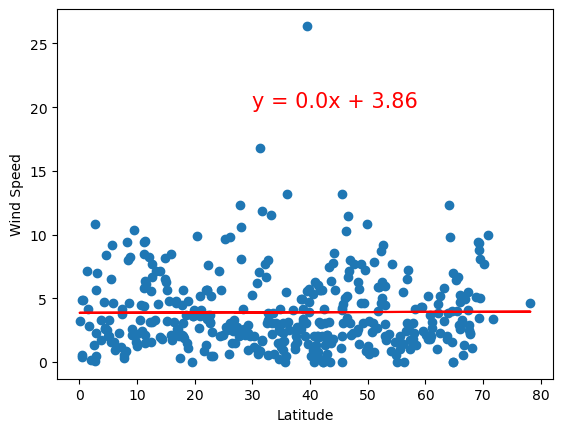

In [67]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = 'Wind Speed'
text_coordinates = (30,20)

plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** The linear relationship between latitude and wind speed is inconclusive. As seen in the scatter plot, the wind speed does not vary as the latitude changes. The regression line slope is horizontal, and so indicates that there is little to no relationship, and so other factors shall be investigated as to determine what impacts a city's wind speed.